# K-Means Clustering
## Oct. 19th, 2021
### Overview: Implementation of KMeans classification 

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import random
import sklearn
import math
import seaborn as sns
%matplotlib inline

In [5]:
plt.rcParams["figure.dpi"] = 200

## Creation of KMeans object
- Constructor: Saves the number of clusters to use, the maximum number of iterations until convergence, and a convergence tolerance
- fit: 
    - Accepts an  𝑚×𝑛  matrix  𝑋  of  𝑚  data points with  𝑛  features. 
    - Chooses  𝑘  random rows of  𝑋  as the initial cluster centers. Runs the  𝑘 -means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times. 
    - Saves the cluster centers; If a cluster is empty, reassigns the cluster center as a random row of  𝑋. 
    - Returns self.
- predict: Accepts an 𝑙×𝑛 matrix 𝑋 of data and returns an array of 𝑙 integers where the 𝑖th entry indicates to which cluster center the  𝑖th row of 𝑋 is closest.
- fit_predict: calls fit and then predict for code streamlining
- plot: plots the data points with colors and markers corresponding to their respective clusters
- returnDictandCenters: simultaneously returns the dictionary mapping cluster centers to their respective data points, and the centers themselves

In [6]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2., normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        #save wattributes
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize
        
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        #number of rows
        m = X.shape[0]
        
        #number of rows to choose as cluster centers
        k = self.n_clusters
        
        #k number of rows which are the initial number of cluster centers
        centers = random.choices(X,k=k)
        self.ogcenters = centers
        
        for i in range(self.max_iter):
            #assign each data point to the cluster center that is closest, forming k clusters
            assignments = dict()
            
            #for each row in X
            for j in X:
                #m is the center that row j is closest to
                m = np.argmin([np.linalg.norm(u - j, ord = self.p) for u in centers])
                
                #adding or appending to assignments dictionary
                if m in assignments:
                    assignments[m].append(j)
                else:
                    assignments[m] = [j]
            
            #checking if any centers haven't been assigned any points
            for x in range(k):
                if x not in assignments:
                    assignments[x] = [random.choice(X)]
            
            #recompute the cluster centers as the means of the new clusters
            adjusted_centers = [np.mean(assignments[x], axis = 0) for x in range(k)]
            
            #normalizing the centers if normalize is set to True
            if self.normalize:
                for x in range(k):
                    adjusted_centers[x] = adjusted_centers[x]/np.linalg.norm(adjusted_centers[x])
            
            #if the difference between the original centers and the adjusted centers are within the convergence tolerance, break
            if all([np.linalg.norm(adjusted_centers[x] - centers[x]) < self.tol for x in range(k)]):
                break
            
            #iterate again with new centers
            centers = adjusted_centers.copy()
        
        #saving cluster centers and assignments as attributes
        self.centers = centers
        self.assignments = assignments
            
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        
        #returns array of l integers; the ith entry indicates which cluster center the ith row of X is closest to
        #use the centers found in fit(), and get which center the ith row is closest to
        
        l_list = [None] * X.shape[0]
        j = 0
        #for ith row in X:
        for i in X:
            #get which center is closest
            center_index = 0
            short_dist = np.linalg.norm(i - centers[0], ord = self.p)
            
            for c in centers[1:]:
                #if distance to center is less than first dist, increment center index and update shortest dist
                dist = np.linalg.norm(i - c, ord = self.p)
                if dist < short_dist:
                    short_dist = dist
                    center_index += 1
            
            
            #add to l_list, increment l_list index
            l_list[j] = center_index
            j += 1
            
        #constructing np array from l_list
        l_array = np.array(l_list)
            
        return l_array
        
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    def plot(self, new_lims = False, XMIN = 0., XMAX = 0., YMIN = 0., YMAX = 0., new_titles = False, TITLE='',XLABEL='',YLABEL=''):
        "Will plot the cluster centers as black crosses. Will plot from the assignments dictionary the clusters by color."
        #list of colors and markers to iterate through
        colors = sns.color_palette(n_colors = self.n_clusters)
        markers = ['*','.','x','d','2','^','s','p','+']             #length 9
        
        #making plots large
        plt.figure(figsize = (8,6))
        
        #iter will be used to iterate through the list of colors and markers
        iter = 0
        
        #plotting points by cluster and iterating through colors and markers
        #for each key in the assignments dictionary (which represents a cluster group):
        for key in self.assignments:
            
            #the length of a specific key in the assignments dictionary is the number of points associated with that cluster/key
            #so for all points associated with a cluster:
            for j in range(len(self.assignments[key])):
                
                #getting a single point in the cluster/key
                point = self.assignments[key][j]
                
                #plotting the x coord (point[0]) with its y coord (point[1])
                plt.plot(point[0],point[1], color = colors[iter], marker = markers[iter])
                
            #incrementing iter, careful not to go to/passed possible index of 9
            iter = (iter + 1) % 9
            
        #plotting centers with black cross
        #EXPLANATION: the i = 0 and incrementing i is for the sake of labeling the legend with "Means"; if I just do plotting
            #with label="Means", the legend gets multiple "Means" labels in there (one for each center point); therefore,
            #I'm starting an i=0 and doing the label only when i is 0 so that "Means" only shows up once in the legend
        i = 0
        for point in self.centers:
            if i == 0:
                plt.plot(point[0],point[1],'kP',markersize = 8, label = "Means")
            else:
                plt.plot(point[0],point[1],'kP',markersize = 8)
            i += 1
        plt.legend(loc = 'upper left')
        
        
        assgn = self.assignments
        #getting domain and range for plot -- Rounding down to nearest int for mins, up for maxes
        #first, list comprehension to get min/max out of all the points in all the keys
        x_min = min([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        #math.floor rounds down to nearest integer 
        x_min = math.floor(x_min)
        
        x_max = max([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        #math.ceil rounds up to nearest integer
        x_max = math.ceil(x_max)
        
        #etc.
        y_min = min([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_min = math.floor(y_min)
        y_max = max([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_max = math.ceil(y_max)
        
        #new limits weren't set
        if not new_lims:
            #labeling and setting domain and range for plot
            plt.xlim([x_min,x_max])
            plt.ylim([y_min,y_max])
        
        #new limits are set
        else: 
            #labeling and setting domain and range for plot
            plt.xlim([XMIN,XMAX])
            plt.ylim([YMIN,YMAX])
        
        #if there are new titles
        if new_titles:
            plt.title(TITLE)
            plt.xlabel(XLABEL)
            plt.ylabel(YLABEL)
            
        #else default titles
        else:
            plt.xlabel('First Principle Component')
            plt.ylabel('Second Principle Component')
        
    def returnDictandCenters(self):
        return self.assignments, self.centers

## Implementation - Iris Data Set

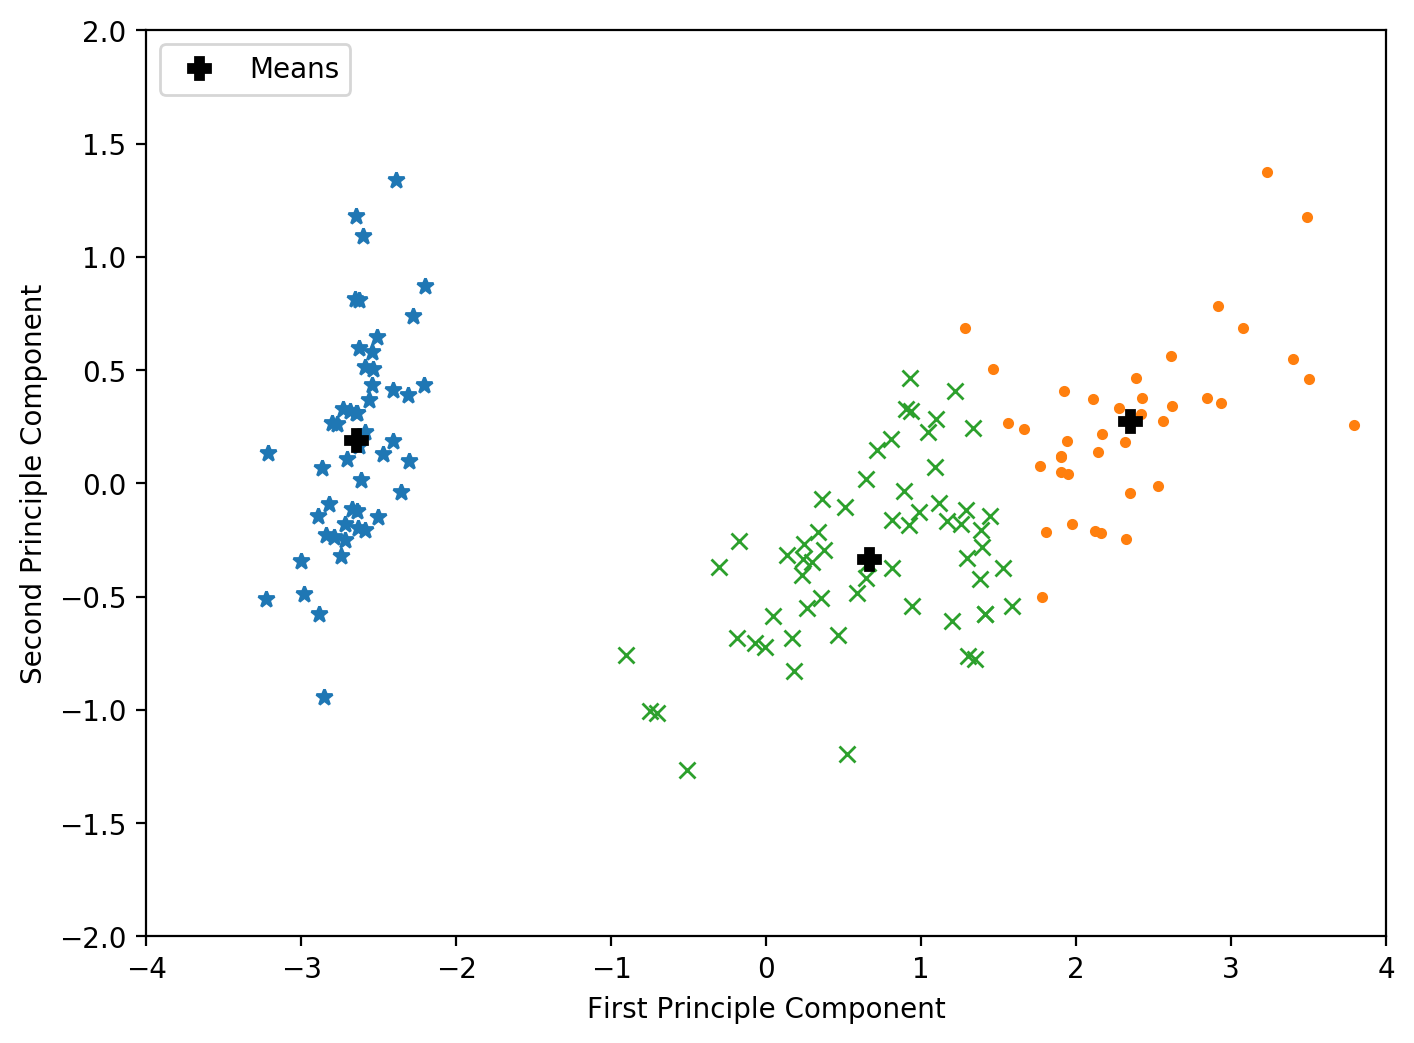

In [7]:
# loading the iris data set
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

# Since only working in 2 dimensions, look only at the first two principal components
iris_data = PCA(n_components=2).fit_transform(iris.data)

# testing class on iris data set
IRIS = KMeans(n_clusters = 3)
IRIS.fit(iris_data)
IRIS.plot()

## Implementation - Different Norms on Sacramento Housing Data

In [8]:
#loading and parsing the sacramento data
sacramento = np.load("sacramento.npy")
sacramento_coords = sacramento[:,6:]

# Clustering the same data according to different norms (the 1, 2, and infinity norms)

#1 norm
sac1 = KMeans(n_clusters = 12,p=1)
sac1.fit(sacramento_coords)

#2 norm
sac2 = KMeans(n_clusters = 12,p=2)
sac2.fit(sacramento_coords)

#infinity norm
sacInf = KMeans(n_clusters = 12,p=np.inf)
sacInf.fit(sacramento_coords)

In [7]:
#getting max distance with 1-norm
max([np.linalg.norm(point - sac1.centers[key]) for key in sac1.assignments for point in sac1.assignments[key]])

0.19396549396022408

In [8]:
#getting max distance with 2-norm
max([np.linalg.norm(point - sac2.centers[key]) for key in sac2.assignments for point in sac2.assignments[key]])

0.1857613416393872

In [9]:
#getting max distance with inf-norm
max([np.linalg.norm(point - sacInf.centers[key]) for key in sacInf.assignments for point in sacInf.assignments[key]])

0.19260502417451134

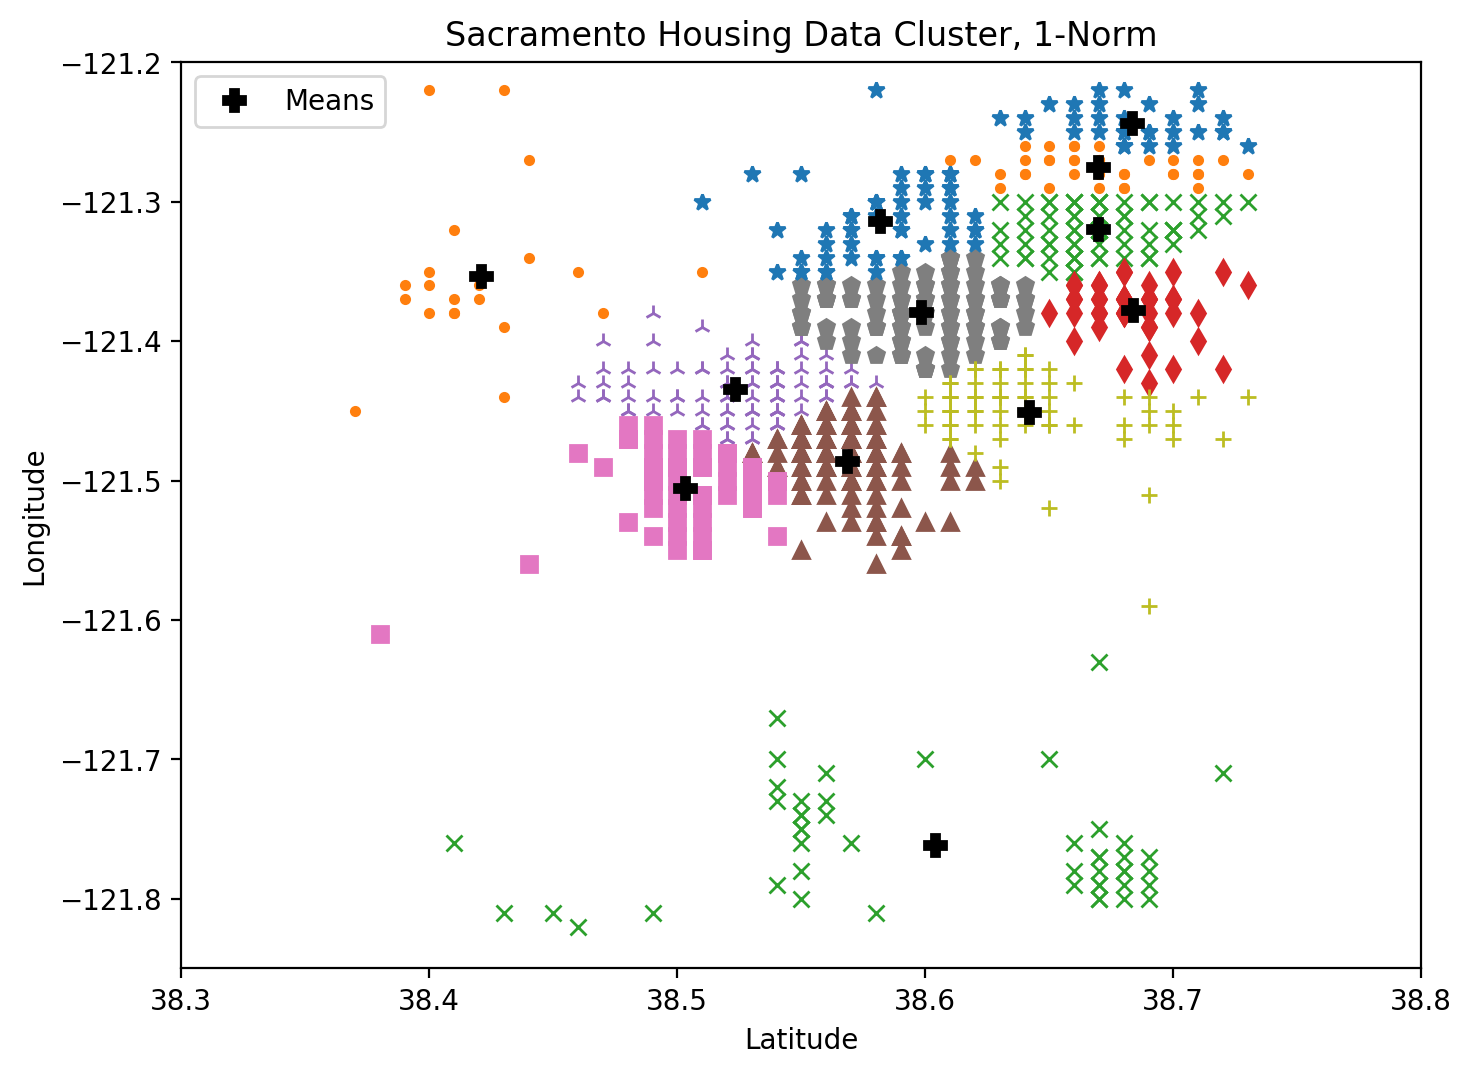

In [10]:
sac1.plot(True, 38.3,38.8,-121.85,-121.2, True,'Sacramento Housing Data Cluster, 1-Norm','Latitude','Longitude')

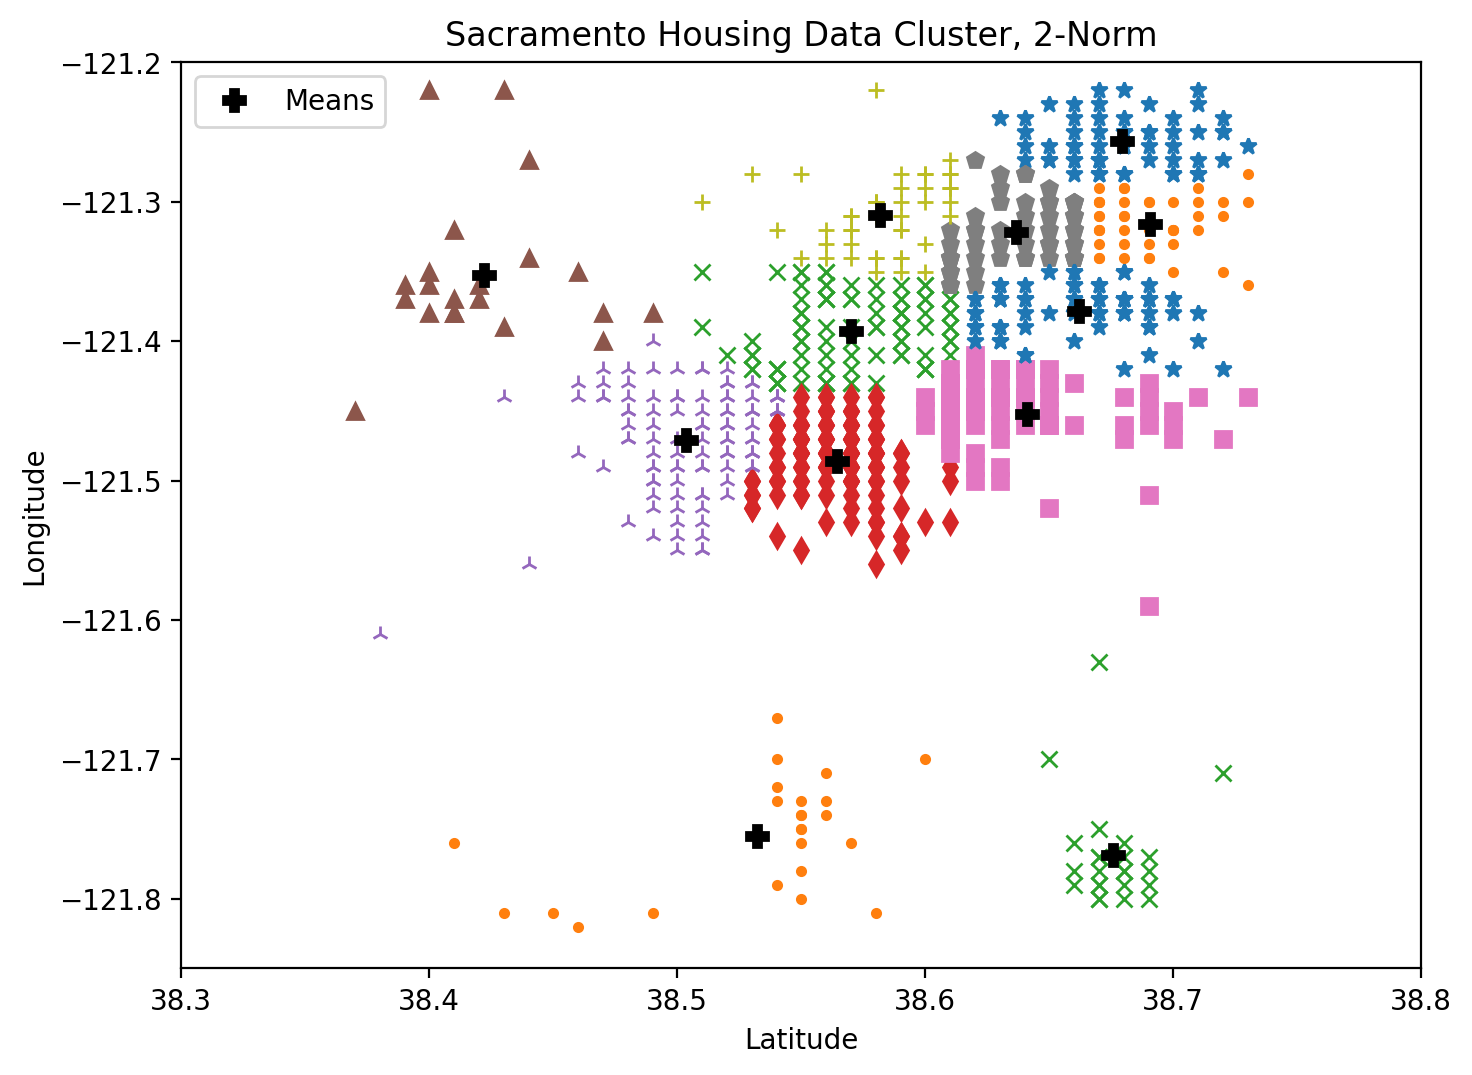

In [11]:
sac2.plot(True, 38.3,38.8,-121.85,-121.2,True,'Sacramento Housing Data Cluster, 2-Norm','Latitude','Longitude')

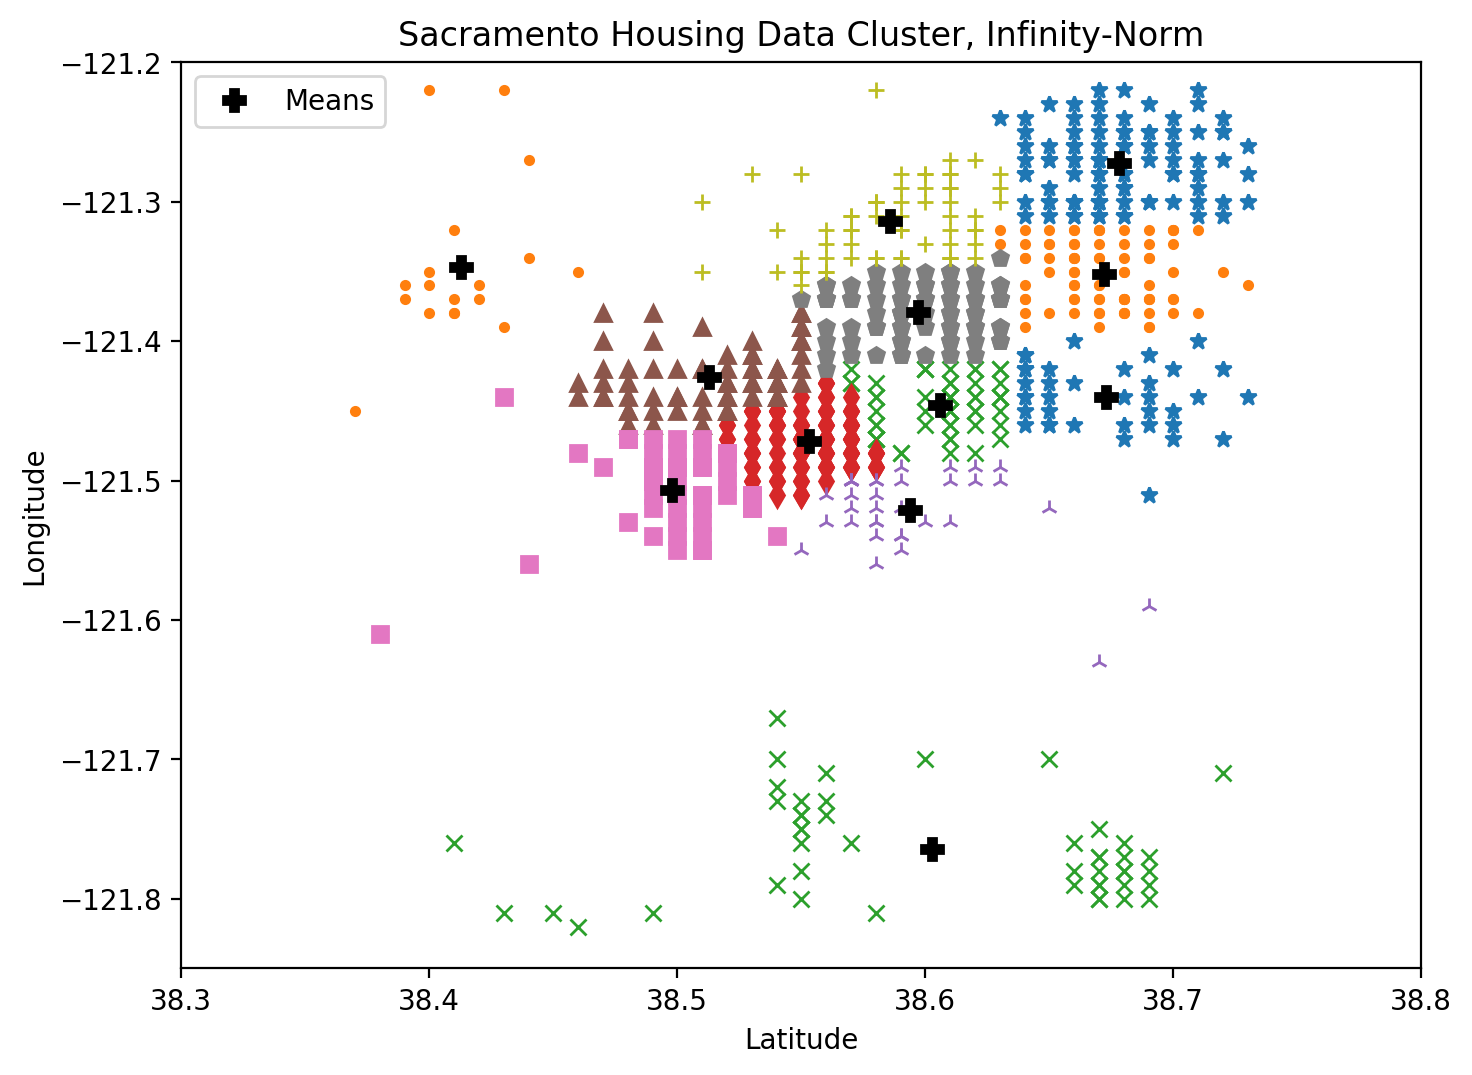

In [12]:
sacInf.plot(True, 38.3,38.8,-121.85,-121.2,True,'Sacramento Housing Data Cluster, Infinity-Norm','Latitude','Longitude')

## Implementation - Earthquake Data

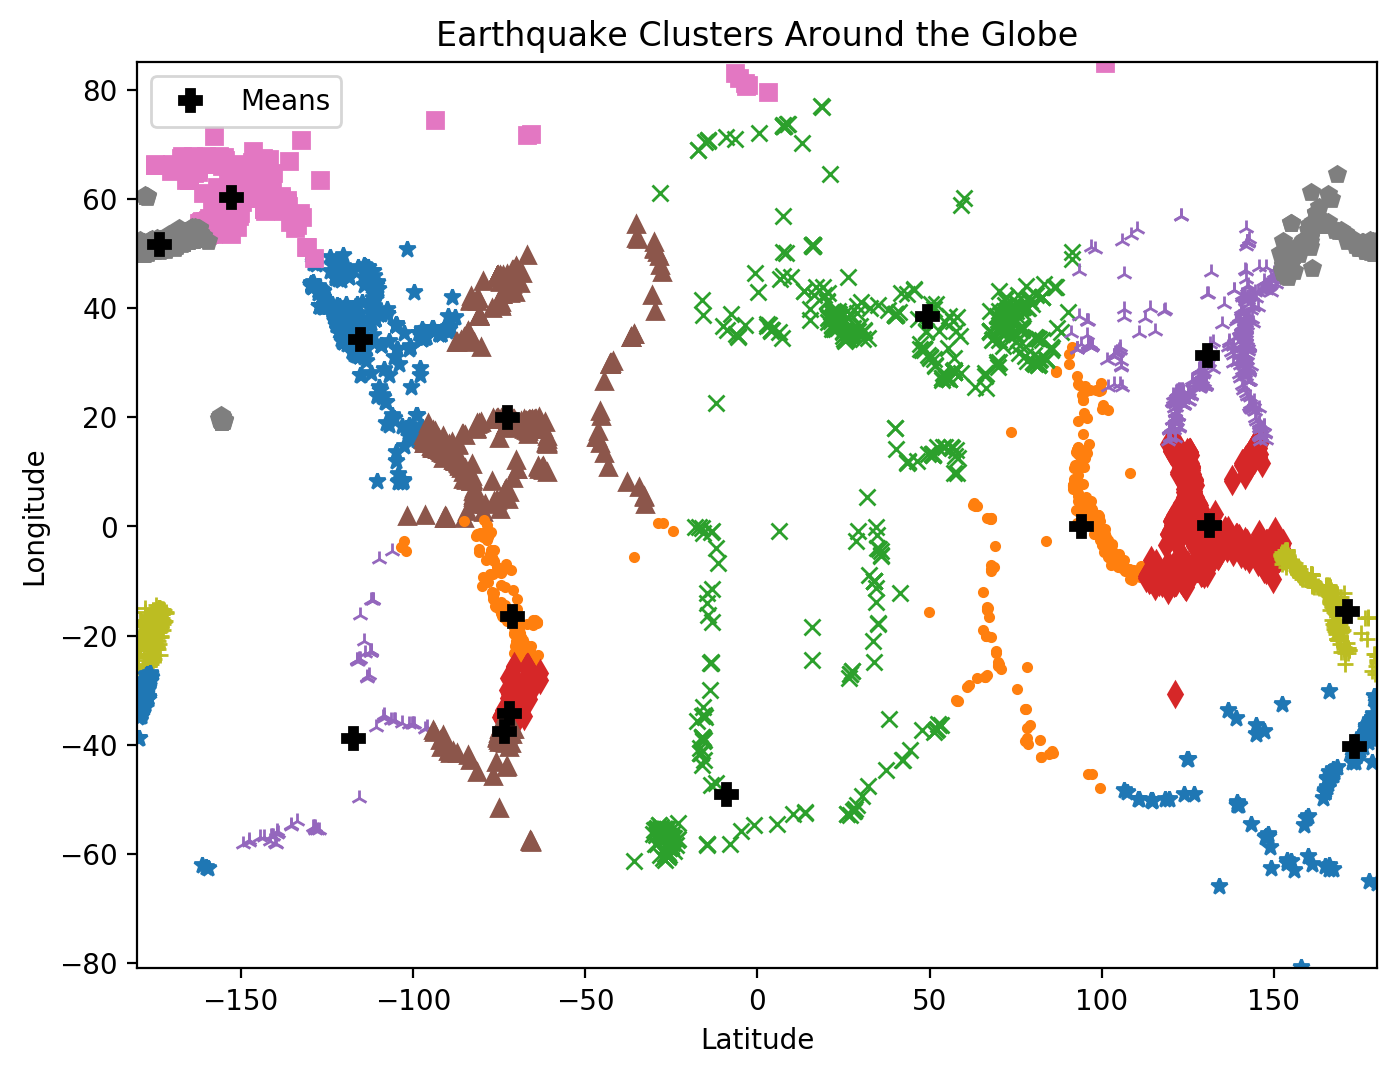

In [9]:
#load coordinates of earthquake locations
earthquake_coords = np.load("earthquake_coordinates.npy")

##CONVERTING TO SPHERICAL COORDINATES, THEN EUCLIDEAN R3, THEN CLUSTERING, THEN RETURNING TO SPHERICAL, THEN R2
i = 0
euc_coords = np.array([None,None,None])

for j in earthquake_coords:
    #getting theta and phi
    theta = np.deg2rad(j[0])
    phi = np.deg2rad(90.-j[1])
    
    #converting from spherical to euclidean
    x = np.sin(phi)*np.cos(theta)
    y = np.sin(phi)*np.sin(theta)
    z = np.cos(phi)
    point = np.array([x,y,z])
    
    euc_coords = np.vstack((euc_coords,point))

euc_coords = euc_coords[1:,:]

#clustering
Earthquakes = KMeans(normalize = True, n_clusters = 15)
Earthquakes.fit(euc_coords)
assignments, centers = Earthquakes.returnDictandCenters()

#putting centers back into lat and long
euc_centers = [None] * len(centers)
i = 0
for center in centers:
    x = center[0]
    y = center[1]
    z = center[2]
    
    phi = np.arccos(z)
    theta = np.arctan2(y,x)
    
    lat = np.rad2deg(theta)
    long = 90 - np.rad2deg(phi)
    
    euc_centers[i] = np.array([lat,long])
    i += 1

Earthquakes.centers = euc_centers
#putting all the points into euclidean
for key in assignments:
    lst_of_points = []
    for point in assignments[key]:
        #print(point)
        x = point[0]
        y = point[1]
        z = point[2]
        
        phi = np.arccos(z)
        theta = np.arctan2(y,x)
        
        lat = np.rad2deg(theta)
        long = 90 - np.rad2deg(phi)
        
        new_point = np.array([lat,long])
        
        lst_of_points.append(new_point)
        
    assignments[key] = lst_of_points
Earthquakes.assignments = assignments

Earthquakes.plot(new_titles=True,TITLE="Earthquake Clusters Around the Globe",XLABEL="Latitude",YLABEL="Longitude")